In [38]:
import numpy as np
import time

In [39]:
size=500
iterations=100

In [40]:
def mandelbrot_python(m,size,iterations):
    for i in range(size):
        for j in range(size):
            c=-2 + 3.0/size*j + 1j*(1.5-3.0/size * i)
            z=0
            for n in range(iterations):
                if np.abs(z) <=10:
                    z=z*z+c
                    m[i,j]=n
                else:
                    break

In [41]:
m=np.zeros((size,size))
start=time.time()
mandelbrot_python(m,size,iterations)
end=time.time()
print(end-start)

16.15235996246338


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

([], <a list of 0 Text yticklabel objects>)

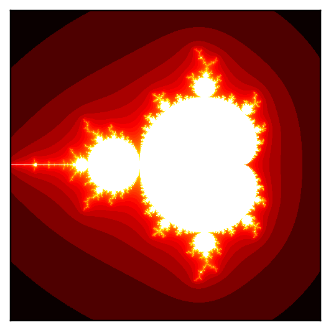

In [43]:
plt.imshow(np.log(m),cmap=plt.cm.hot)
plt.xticks([])
plt.yticks([])

# using numba we will speed up generating julia set

In [44]:
import numba
from numba import jit,complex128

In [45]:
@jit(locals=dict(c=complex128,z=complex128))
def mandelbrot_numba(m,size,iterations):
    for i in range(size):
        for j in range(size):
            c=-2+3.0/size*j +1j*(1.5-3.0/size*i)
            z=0
            for n in range(iterations):
                if np.abs(z) <=10:
                    z=z*z+c
                    m[i,j]=n
                else:
                    break

In [46]:
m=np.zeros((size,size))
start=time.time()
mandelbrot_numba(m,size,iterations)
end=time.time()
print(end-start)

0.2736508846282959


([], <a list of 0 Text yticklabel objects>)

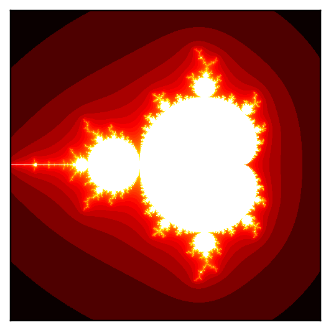

In [47]:
plt.imshow(np.log(m),cmap=plt.cm.hot)
plt.xticks([])
plt.yticks([])

In [48]:
import numexpr as ne

In [49]:
x,y,z=np.random.rand(3,1000000)

In [50]:
%timeit x+(y**2+(z*x+1)*3)

10 loops, best of 3: 27.9 ms per loop


In [51]:
%timeit ne.evaluate('x+(y**2+(z*x+1)*3)')

100 loops, best of 3: 6.16 ms per loop


In [52]:
ne.ncores

4

In [54]:
for i in range(1,5):
    ne.set_num_threads(i)
    %timeit ne.evaluate('x+(y**2+(z*x+1)*3)')

100 loops, best of 3: 9.22 ms per loop
100 loops, best of 3: 6.27 ms per loop
100 loops, best of 3: 6.09 ms per loop
100 loops, best of 3: 5.98 ms per loop
